#**Bank Customer Churn Model**

##**Objectives**##

**Importing the liabries**

**Reading the dataset from the source**

**Data Preprocessing**

**Data Visulaizing**

**Data Encoding**

**Feature Engineering**

**Handling the Imbalance Data**

**Classication of data for model setup**

**Splitting the data for training the model**

**Support Vector Machine Classifier**

**Evaluation of the Model**

**Hyper Prameter Tunning the Model using the GridSearch**





##**Imporing the libraries and modules**##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##**Reading the CSV file from the source**##

In [ ]:
bank_data = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

##**Displaying the Dataset**##

In [ ]:
bank_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##**Description of the dataset**##

In [ ]:
bank_data.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  Num Of Products  Has Credit Card  Is Active Memb

##**Data Preprocessing**##

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


**There are 10,000 non null values in the dataset, which means there exist no missing values in the dataset.**

In [ ]:
bank_data.duplicated('CustomerId').sum()

0

##**Data Visualization**##

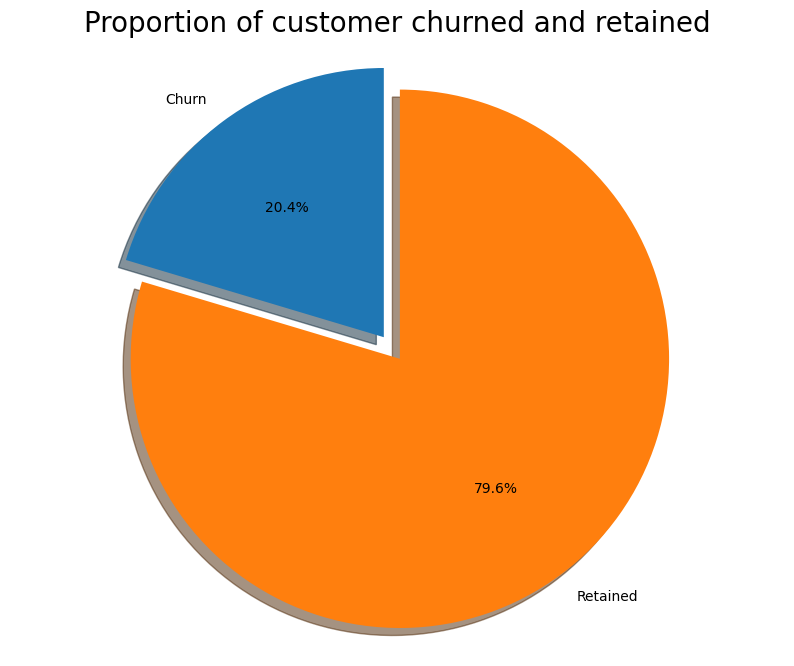

In [ ]:
labels = 'Churn', 'Retained'
sizes = [bank_data.Churn[bank_data['Churn']==1].count(), bank_data.Churn[bank_data['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

##**Displaying the correlation Matrix of the dataset**##

<ipython-input-142-f5b125d7f297>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  axis = sns.heatmap(data=bank_data.corr(method='pearson',min_periods=1),annot=True,cmap="YlGnBu")


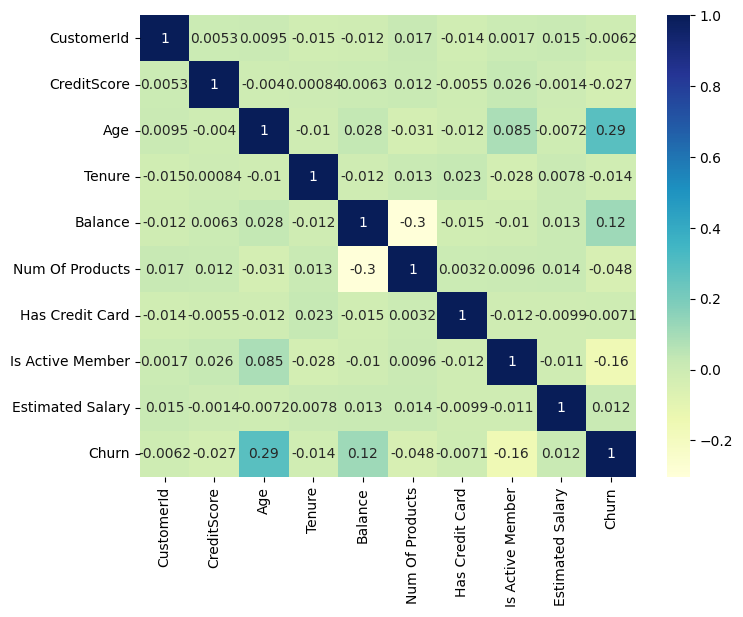

In [ ]:
fig,axis = plt.subplots(figsize=(8,6))
axis = sns.heatmap(data=bank_data.corr(method='pearson',min_periods=1),annot=True,cmap="YlGnBu")

##**Distribution of the Customer Churn in Various Countries**##

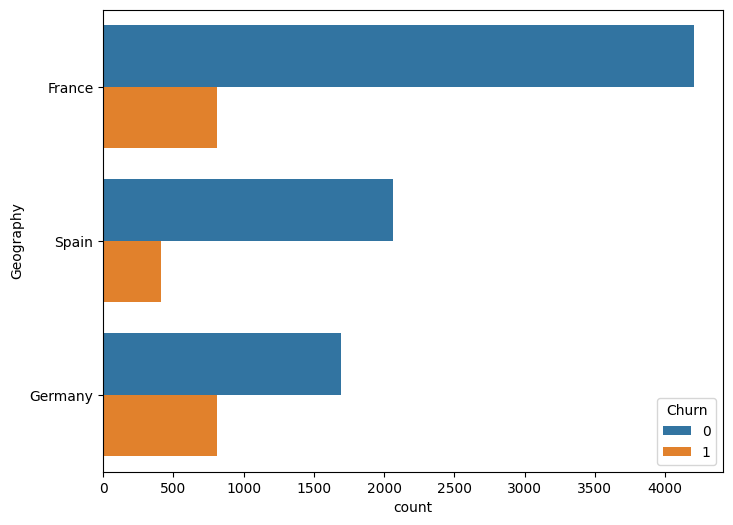

In [ ]:
from itertools import chain
countmale = bank_data[bank_data['Gender']=='Male']['Gender'].count()
countfemale= bank_data[bank_data['Gender']=='Female']['Gender'].count()
fig,aix = plt.subplots(figsize=(8,6))
#print(countmale)
#print(countfemale)
aix = sns.countplot(hue='Churn',y='Geography',data=bank_data)

##**Disrtribution of Customer Age in the dataset**##

<ipython-input-144-a57c11fb969e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axis = sns.distplot(age,kde=False,bins=200)


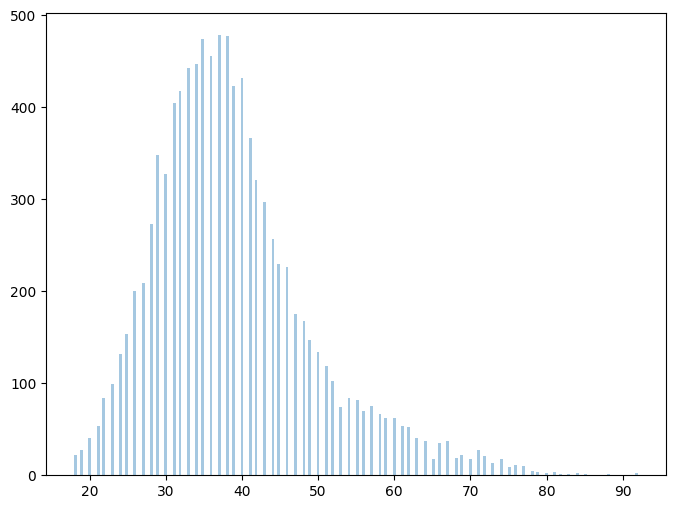

In [ ]:
age = np.array(bank_data['Age'])
fig,axis = plt.subplots(figsize=(8,6))
axis = sns.distplot(age,kde=False,bins=200)

##**Data Encoding**##

In [ ]:
bank_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
bank_data.replace({'Geography': {'France': 2, 'Germany':1, 'Spain':0}}, inplace=True)

In [ ]:
bank_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
bank_data.replace({'Gender': {'Male':0, 'Female':2, }}, inplace=True)

In [ ]:
bank_data['Gender'].value_counts()

0    5457
2    4543
Name: Gender, dtype: int64

In [ ]:
bank_data['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [ ]:
bank_data.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [ ]:
bank_data['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [ ]:
bank_data['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [ ]:
bank_data.loc[(bank_data['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
bank_data['Zero Balance'] = np.where(bank_data['Balance']>0, 1,0)

<Axes: >

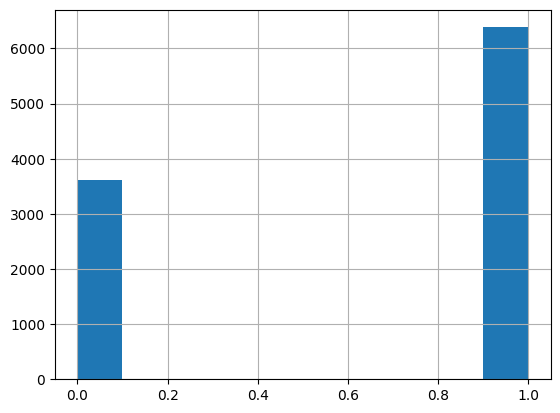

In [ ]:
bank_data['Zero Balance'].hist()

In [ ]:
bank_data.groupby(['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

##**Feature Engineering**##

In [ ]:
bank_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
x = bank_data.drop(['Surname', 'Churn'], axis = 1)
y = bank_data['Churn']

In [ ]:
x.shape, y.shape

((10000, 12), (10000,))

##**Handling the Imbalanced Data**##

In [ ]:
bank_data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

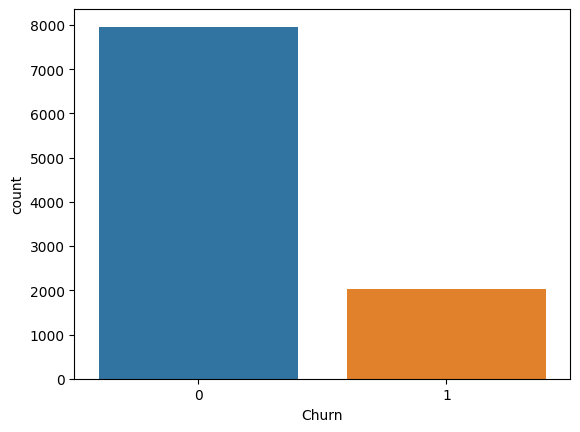

In [ ]:
sns.countplot(x = 'Churn', data = bank_data)

##**Random Under-Sampling**##

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)
x_rus, y_rus = rus.fit_resample(x,y)


##**Dimension of the Random under-sampling model**##

In [ ]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

##**Visualizing the Random Under - Sampling**##

<Axes: ylabel='Frequency'>

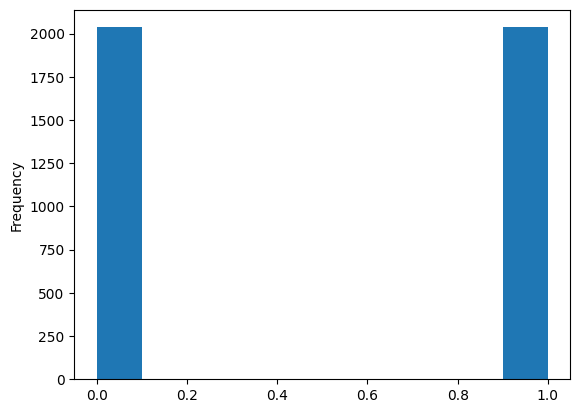

In [ ]:
y_rus.plot(kind = 'hist')

##**Random Over-Sampling**##

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2529)
x_ros, y_ros = ros.fit_resample(x,y)


##**Dimension of the Random Over-Sampling Model**##

In [ ]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

##**Visualizing the Random Over-Sampling Model**##

<Axes: ylabel='Frequency'>

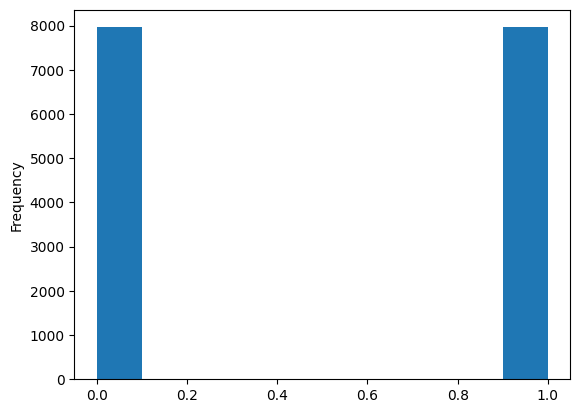

In [ ]:
y_ros.plot(kind = 'hist')

##**Splitting the Data for Fitting the Model**##

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3) #Split Random Under Sample Data
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3) #Split Random Over Sample Data

##**Standardization**##

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

##**Support Vector Machine Classifier**##

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

##**Predicting the SVM Model**##

In [ ]:
y_pred = svc.predict(x_test)

##**Model Evaluation**##

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2414,    0],
       [ 586,    0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Hyper Parameter Tunning**##

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

grid =  GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)


##**Fitting the GridSearchCV Model**##



In [ ]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

##**Best Estimators of the GridSearchCV Model**##

In [ ]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_prediction = grid.predict(x_test)
confusion_matrix(y_test,grid_prediction)

array([[2414,    0],
       [ 586,    0]])

##**Model Evaluation of the Hypertunned Model**##

In [ ]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Fitting the Model using the Random Under-Sampling Data**##

In [ ]:
svc_rus = SVC()
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [ ]:
y_pred_rus= svc_rus.predict(x_test_rus)
confusion_matrix(y_test_rus,y_pred_rus)

array([[599,   0],
       [624,   0]])

In [ ]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       599
           1       0.00      0.00      0.00       624

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Hyper Parameter Tunning of the Model with Random Under-Sampling**##

In [ ]:
param_grid = {'C':[0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}
grid_rus =  GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

##**Fitting the Model with Random Over-Sampling Data**##

In [ ]:
svc_ros = SVC()
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [ ]:
y_pred_ros = svc_ros.predict(x_test_ros)

In [ ]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[2378,    0],
       [2400,    0]])

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2378
           1       0.00      0.00      0.00      2400

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Hyper Parameter Tunning of the Model using the Random Over-Sampling**##

In [ ]:
param_grid = {'C':[0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}
grid_ros =  GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid_ros.predict(x_test_ros)
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2391,    0],
       [ 153, 2234]])

In [ ]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2391
           1       1.00      0.94      0.97      2387

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778



#**Summarizing the Results**

#**Model Evaluation of the Original Data**##

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Model Evaluation of the Hypertunned Original Data**##

In [ ]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Model Evaluation of the Random Under-Sampling Data**##

In [ ]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       618
           1       0.49      1.00      0.66       605

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Model Evaluation of the Random Over-Sampling Data**##

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2391
           1       0.50      1.00      0.67      2387

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
